In [10]:
import pandas as pd
df = pd.read_csv('./data/smartphone.csv', encoding='utf-8')
galexy_posts = df.get('Title') + " " + df.get('Description')

In [11]:
from eunjeon import Mecab
tagger = Mecab()

galexy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galexy_stop_words = galexy_stop_words.split(' ')
galexy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
galexy_nouns = []
for post in galexy_posts:
    for noun in tagger.nouns(post):
        if noun not in galexy_stop_words:
            galexy_nouns.append(noun)
            
galexy_nouns[0:10]

['삼성', '더블', '갤럭시', '특징', '사전', '예약', '새벽', '삼성', '갤럭시', '언']

In [4]:
from collections import Counter
num_top_nouns = 20
galexy_nouns_counter = Counter(galexy_nouns)
galexy_top_nouns = dict(galexy_nouns_counter.most_common(num_top_nouns))
galexy_top_nouns

{'갤럭시': 3352,
 '삼성': 2544,
 '스마트폰': 397,
 '삼성전자': 366,
 '출시': 273,
 '폴드': 264,
 '노트': 224,
 '워치': 211,
 '공개': 208,
 '플러스': 195,
 '사용': 193,
 '카메라': 173,
 '더블': 163,
 '모델': 159,
 '스펙': 154,
 '가격': 141,
 '시리즈': 137,
 '이번': 129,
 '제품': 128,
 '기능': 122}

In [5]:
!pip install wordcloud

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
from wordcloud import WordCloud
galexy_wc = WordCloud(background_color="white", font_path='./font/NanumBarunGothic.ttf')
galexy_wc.generate_from_frequencies(galexy_top_nouns)

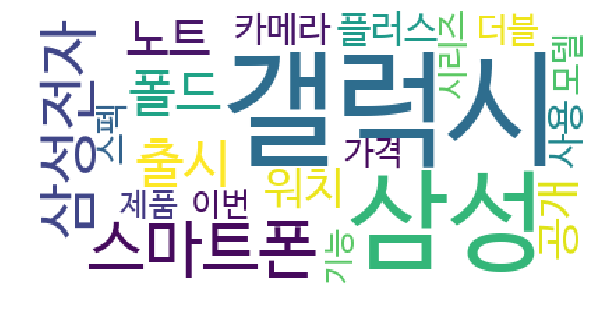

In [7]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(galexy_wc)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
galexy_tfidv = TfidfVectorizer().fit(galexy_top_nouns)
galexy_tfidv.transform(galexy_posts).toarray()

array([[0.        , 0.40824829, 0.        , ..., 0.        , 0.40824829,
        0.        ],
       [0.38490018, 0.57735027, 0.19245009, ..., 0.        , 0.38490018,
        0.        ],
       [0.        , 0.63960215, 0.        , ..., 0.        , 0.63960215,
        0.        ],
       ...,
       [0.        , 0.        , 0.5       , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.8660254 , 0.28867513, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.70710678]])

In [9]:
pd.DataFrame(galexy_tfidv.transform(galexy_posts).toarray())

0         1         2         3         4    5    6         7   \
0    0.000000  0.408248  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
1    0.384900  0.577350  0.192450  0.000000  0.000000  0.0  0.0  0.000000   
2    0.000000  0.639602  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
3    0.000000  0.937043  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
4    0.000000  0.707107  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
5    0.000000  0.377964  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
6    0.000000  0.666667  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
7    0.000000  0.816497  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
8    0.000000  0.894427  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
9    0.000000  0.784465  0.000000  0.000000  0.000000  0.0  0.0  0.196116   
10   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.333333   
11   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
12   0.000000  0.784465  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
13   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
14   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
15   0.000000  0.000000  0.500000  0.000000  0.000000  0.0  0.0  0.000000   
16   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
17   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
18   0.577350  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
19   0.000000  0.603023  0.000000  0.301511  0.301511  0.0  0.0  0.000000   
20   0.000000  0.353553  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
21   0.000000  0.894427  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
22   0.000000  0.857493  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
23   0.196116  0.784465  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
24   0.000000  0.832050  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
25   0.000000  0.832050  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
26   0.000000  0.745356  0.149071  0.000000  0.000000  0.0  0.0  0.000000   
27   0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
28   0.000000  0.447214  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
29   0.000000  0.707107  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
..        ...       ...       ...       ...       ...  ...  ...       ...   
970  0.000000  0.816497  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
971  0.000000  0.408248  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
972  0.000000  0.707107  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
973  0.000000  0.588348  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
974  0.000000  0.801784  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
975  0.000000  0.688247  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
976  0.000000  0.000000  0.000000  0.000000  0.301511  0.0  0.0  0.000000   
977  0.000000  0.301511  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
978  0.000000  0.632456  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
979  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
980  0.000000  0.832050  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
981  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
982  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
983  0.000000  0.894427  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
984  0.000000  0.588348  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
985  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
986  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
987  0.000000  0.811107  0.324443  0.000000  0.000000  0.0  0.0  0.000000   
988  0.000000  0.666667  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
989  0.000000  0.577350  0.000000  0.000000  0.000000  0.0  0.0  0.000000   
990  0.